<a href="https://colab.research.google.com/github/savithrik199/DL-projects/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import numpy as np 
from  plotly.offline import init_notebook_mode ,plot,iplot
import cufflinks as cf 
import plotly.offline as pyo
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
covid="/content/drive/MyDrive/timeseries.zip"

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile(covid,"r") as zip1:
  zip1.printdir()
  zip1.extractall()

File Name                                             Modified             Size
covid_19_data.csv                              2021-02-28 10:05:50     17207067
time_series_covid_19_confirmed.csv             2021-02-28 10:05:52       504441
time_series_covid_19_confirmed_US.csv          2021-02-28 10:05:52      5126660
time_series_covid_19_deaths.csv                2021-02-28 10:05:52       350278
time_series_covid_19_deaths_US.csv             2021-02-28 10:05:52      3639057
time_series_covid_19_recovered.csv             2021-02-28 10:05:52       453388


In [ ]:
data1="/content/covid_19_data.csv"

In [ ]:
data1=pd.read_csv(data1)

In [ ]:
data1.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
data1.rename(columns={'Country/Region':'Country'},inplace=True)
data1.rename(columns={'ObservationDate':'Date'},inplace=True)
data1.rename(columns={'Province/State':'State'},inplace=True)
data1.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
data1.tail()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
236012,236013,02/27/2021,Zaporizhia Oblast,Ukraine,2021-02-28 05:22:20,69504.0,1132.0,65049.0
236013,236014,02/27/2021,Zeeland,Netherlands,2021-02-28 05:22:20,16480.0,178.0,0.0
236014,236015,02/27/2021,Zhejiang,Mainland China,2021-02-28 05:22:20,1321.0,1.0,1314.0
236015,236016,02/27/2021,Zhytomyr Oblast,Ukraine,2021-02-28 05:22:20,50582.0,834.0,44309.0
236016,236017,02/27/2021,Zuid-Holland,Netherlands,2021-02-28 05:22:20,255335.0,3732.0,0.0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SNo          236017 non-null  int64  
 1   Date         236017 non-null  object 
 2   State        173972 non-null  object 
 3   Country      236017 non-null  object 
 4   Last Update  236017 non-null  object 
 5   Confirmed    236017 non-null  float64
 6   Deaths       236017 non-null  float64
 7   Recovered    236017 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 14.4+ MB


In [ ]:
data1.describe()

,SNo,Confirmed,Deaths,Recovered
count,236017.000000,2.360170e+05,236017.000000,2.360170e+05
mean,118009.000000,5.715800e+04,1487.719368,3.393027e+04
std,68132.383579,1.834751e+05,4770.414639,1.474800e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,59005.000000,7.270000e+02,9.000000,1.000000e+01
50%,118009.000000,6.695000e+03,127.000000,1.224000e+03
75%,177013.000000,3.349900e+04,880.000000,1.263900e+04
max,236017.000000,3.664050e+06,108208.000000,6.399531e+06


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
data1.describe(include='all')

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
count,236017.00,236017,173972,236017,236017,236017.00,236017.00,236017.00
unique,nan,403,737,227,2143,nan,nan,nan
top,nan,02/26/2021,Unknown,Russia,2020-11-11 05:25:30,nan,nan,nan
freq,nan,764,2637,22698,1495,nan,nan,nan
mean,118009.00,NaN,NaN,NaN,NaN,57158.00,1487.72,33930.27
std,68132.38,NaN,NaN,NaN,NaN,183475.10,4770.41,147479.96
min,1.00,NaN,NaN,NaN,NaN,-302844.00,-178.00,-854405.00
25%,59005.00,NaN,NaN,NaN,NaN,727.00,9.00,10.00
50%,118009.00,NaN,NaN,NaN,NaN,6695.00,127.00,1224.00
75%,177013.00,NaN,NaN,NaN,NaN,33499.00,880.00,12639.00


In [ ]:
confirmed = data1.groupby('Date').sum()['Confirmed'].reset_index()
deaths= data1.groupby('Date').sum()['Deaths'].reset_index()
recovered=  data1.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed.head()

,Date,Confirmed
0,01/01/2021,84054370.00
1,01/02/2021,84679917.00
2,01/03/2021,85212884.00
3,01/04/2021,85766126.00
4,01/05/2021,86504791.00


In [ ]:
deaths.head()

,Date,Deaths
0,01/01/2021,1835216.00
1,01/02/2021,1843620.00
2,01/03/2021,1850931.00
3,01/04/2021,1861107.00
4,01/05/2021,1876406.00


In [ ]:
recovered.head()

,Date,Recovered
0,01/01/2021,47313005.00
1,01/02/2021,47614297.00
2,01/03/2021,47882779.00
3,01/04/2021,48173187.00
4,01/05/2021,48488548.00


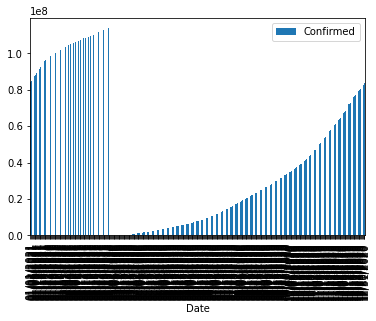

In [ ]:
confirmed.plot(kind='bar',x='Date',y='Confirmed')

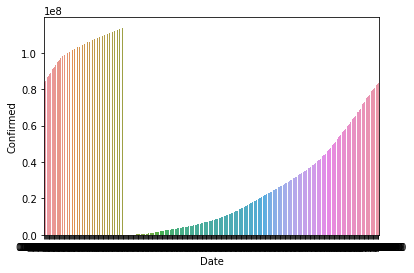

In [ ]:
sns.barplot(x=confirmed['Date'],y=confirmed['Confirmed'])

<BarContainer object of 403 artists>

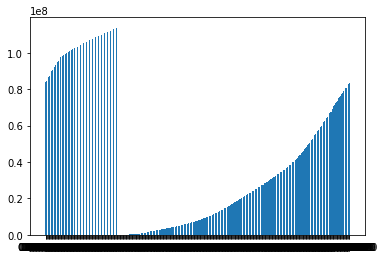

In [ ]:
plt.bar(x=confirmed['Date'],height=confirmed['Confirmed'])

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
confirmed.iplot(kind='bar',x='Date',y='Confirmed')

In [ ]:
deaths.iplot(kind='bar',x='Date',y='Deaths')

In [ ]:
recovered.iplot(kind='bar',x='Date',y='Recovered')

In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed.columns= ['ds','y']
confirmed['ds'] =pd.to_datetime(confirmed['ds'])
confirmed 

,ds,y
0,2021-01-01,84054370.00
1,2021-01-02,84679917.00
2,2021-01-03,85212884.00
3,2021-01-04,85766126.00
4,2021-01-05,86504791.00
...,...,...
398,2020-12-27,80879838.00
399,2020-12-28,81375961.00
400,2020-12-29,82038435.00
401,2020-12-30,82798666.00


In [ ]:
model = Prophet(interval_width =0.95)
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future  = model.make_future_dataframe(periods=90)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
488,2021-05-24
489,2021-05-25
490,2021-05-26
491,2021-05-27


In [ ]:
forecast_confirmed= model.predict(future)

In [ ]:
forecast_confirmed= model.predict(future)

In [ ]:
forecast_confirmed[['ds','yhat','yhat_lower','yhat_upper']].tail(40)

,ds,yhat,yhat_lower,yhat_upper
453,2021-04-19,146708889.72,140972209.82,151916161.52
454,2021-04-20,147279306.23,141222072.25,152513515.21
455,2021-04-21,147879779.25,141330997.86,153155601.43
456,2021-04-22,148493517.54,142205967.02,154263074.54
457,2021-04-23,149090305.74,142199243.57,154658298.72
458,2021-04-24,149655984.03,142894541.89,155253255.94
459,2021-04-25,150244408.19,143446961.37,156564973.57
460,2021-04-26,150776138.04,143798453.34,156778763.24
461,2021-04-27,151346554.56,143823421.84,157701964.13
462,2021-04-28,151947027.57,144547432.66,158259872.89
